<h1 align='center'><font color='orange'>Bike Sharing Demand Prediction</font></h1>
<h3 align='center'><font color='orange'><i>A Machine Learning approach to forecast Bike Rental Demand</i></font></h3>
<h2 align='center'><font color='orange'>Part 1 - Exploratory Data Analysis</font></h2>

## To try out the project, [click here...](https://bike-demand-prediction.herokuapp.com/)

#### -> To check out Part 2 (Data Preparation), [click here](https://nbviewer.jupyter.org/github/SarthakRana/Bike-Sharing-Demand-Prediction/blob/main/bike_sharing_data_preparation_Part2.ipynb)
#### -> To check out Part 3 (Modelling), [click here](https://nbviewer.jupyter.org/github/SarthakRana/Bike-Sharing-Demand-Prediction/blob/main/bike-demand-prediction-modelling-part3.ipynb)

<h1 align='center'><img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2017/09/092817_chinabikeshare.jpg"></h1>

# Quick Navigation
* [1. Introduction](#1)
* [2. Getting started...](#2)
    * [2.1 Importing relevant packages](#3)
    * [2.2 Importing Data](#4)
    * [2.3 About the data](#5)
* [3. Exploratory Data Analysis](#6)
    * [3.1 Data Summary](#7)
    * [3.2 Feature Engineering](#8)
    * [3.3 Univariate Analysis](#9)
        * [3.3.1 Weather Frequency Distribution](#10)
        * [3.3.2 Analysis of Temperature, Feels like temperature, Humidity and Windspeed](#11)
        * [3.3.3 Target Feature Analysis](#12)
    * [3.4 Bi-Variate Analysis](#13)
        * [3.4.1 How the Time of Day (Hour) relates with the Bike Rental](#14)
        * [3.4.2 How Month affects the Bike Rental](#15)
        * [3.4.3 How Season affects the Bike Rental Demand](#16)
        * [3.4.4 How holiday, working day and weekend affect the Rental Bike Demand](#17)
        * [3.4.5 How Weather affects the Rental Bike Demand](#18)
        * [3.4.6 How Temperature affects the Bike Rental Demand](#19)
        * [3.4.7 How Humidity and Windspeed affect the Biker Rental Demand](#20)
    * [3.5 Correlation Analysis](#21)
    * [3.6 Outlier Analysis](#22)

<a id='1'></a>
# 1. Introduction
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. Our task is to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

<a id='2'></a>
# 2. Getting started...

<a id='3'></a>
## 2.1 Importing relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

<a id='4'></a>
## 2.2 Importing data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10187,2012-11-09 21:00:00,4,0,1,1,13.94,18.180,76,0.0000,23,176,199
5574,2012-01-07 09:00:00,1,0,0,1,9.02,11.365,80,8.9981,14,116,130
4297,2011-10-11 02:00:00,4,0,1,2,21.32,25.000,94,8.9981,1,4,5
2026,2011-05-11 08:00:00,2,0,1,1,19.68,23.485,77,16.9979,21,421,442
9094,2012-09-02 07:00:00,3,0,0,1,27.06,29.545,94,6.0032,13,29,42


<a id='5'></a>
## 2.3 About data

#### Dataset source : https://www.kaggle.com/c/bike-sharing-demand/data (Also available at UCI ML Repository)


In this data, we are provided with hourly rental data spanning two years. The training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set.

* **datetime** - hourly date + timestamp  
* **season** -  
    * 1 = spring 
    * 2 = summer
    * 3 = fall
    * 4 = winter 
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather** - 
    * 1 = Clear, Few clouds, Partly cloudy, Partly cloudy
    * 2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * 3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * 4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **casual** - number of non-registered user rentals initiated
* **registered** - number of registered user rentals initiated
* **count** - number of total rentals

<a id='6'></a>
# 3. Exploratory Data Analysis (EDA) : 

We would be covering the following points for exploring and analysing the data fully :
1. Data summary
2. Feature Engineering
3. Univariate Analysis
4. Bi-variate Analysis
5. Correlation Analysis
6. Outlier Analysis

<a id='7'></a>
## 3.1 Data Summary

In [3]:
# 1. Observations and features in train and test set
print(f"Train Data Observations = {train_data.shape[0]}")
print(f"Train Data Features = {train_data.shape[1]}")
print(f"Test Data Observations = {test_data.shape[0]}")
print(f"Test Data Features = {test_data.shape[1]}")

Train Data Observations = 10886
Train Data Features = 12
Test Data Observations = 6493
Test Data Features = 9


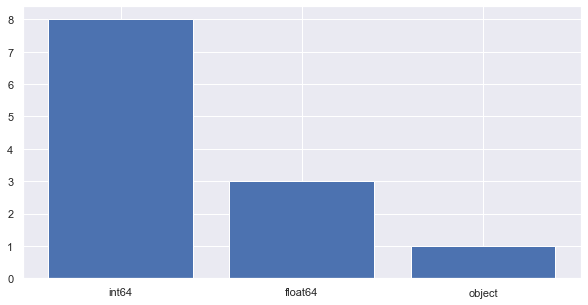

In [4]:
# 2. Datatypes of features
plt.figure(figsize=(10,5))
dtype_df = pd.DataFrame({"Dtypes": ['int64', 'float64', 'object'], "Count" : train_data.dtypes.value_counts()})
x = list(dtype_df['Dtypes'])
y = list(dtype_df['Count'])
plt.bar(x,y)
plt.show()

In [5]:
# 3. Descriptive Statistics
train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<a id='8'></a>
## 3.2 Feature Engineering

Notice how `season`, `holiday`, `workingday` and `weather` features have already been encoded for us. This encoding will be helpful when we will prepare final data for modelling. But here, we will change these from `int` back to `categorical` features for analysis purpose.

We will extract the values for `date`, `hour`, `year` and `month` from `datetime` feature and drop it after that. Again, this is just being done for the analysis purpose. The final data we will use will have different features. 

In [6]:
def getMonthName(monthCol):
    monthDict = {
        '01' : 'Jan', '02' : 'Feb', '03' : 'Mar', '04' : 'Apr', '05' : 'May', '06' : 'Jun', 
        '07' : 'Jul', '08' : 'Aug', '09' : 'Sep', '10' : 'Oct', '11' : 'Nov', '12' : 'Dec',
    }
    month_name = []
    for i in range(monthCol.size):
        month_name.append(monthDict[monthCol[i]])
    return month_name

In [7]:
# Get date from datetime
train_data['date'] = train_data['datetime'].apply(lambda x : x.split(' ')[0])

# Get time of day (Hour) from datetime
train_data['hour'] = train_data['datetime'].apply(lambda x : x.split(' ')[1])

# Get year from datetime
train_data['year'] = train_data['datetime'].apply(lambda x : x.split(' ')[0]).apply(lambda y : y.split('-')[0])

# Get month from datetime
train_data['month'] = train_data['datetime'].apply(lambda x : x.split(' ')[0]).apply(lambda y : y.split('-')[1])
train_data['month'] = getMonthName(train_data['month'])

# drop datetime feature
del train_data['datetime']

# Get whether day is weekend or not
weekend = []
for i in range(train_data.shape[0]):
    if train_data['holiday'][i] == 0 and train_data['workingday'][i] == 0:
        weekend.append('Yes')
    else:
        weekend.append('No')
train_data['weekend'] = weekend

In [8]:
# Convert season, holiday, workingday and weather features from Int to categorical type
train_data['season'] = train_data['season'].map({1 : "Spring", 
                                                 2 : "Summer", 
                                                 3 : "Fall", 
                                                 4 : "Winter"})

train_data['holiday'] = train_data['holiday'].map({0 : "No", 1 : "Yes"})

train_data['workingday'] = train_data['workingday'].map({0 : "No", 1 : "Yes"})

train_data['weather'] = train_data['weather'].map({1 : "Clear + Few clouds", 
                                                   2 : "Mist + Cloudy",
                                                   3 : "Light Rain + Scattered clouds",
                                                   4 : "Heavy Rain + Ice Pallets"})

In [9]:
# Rearrange columns
train_data.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'hour', 'year', 'month', 'weekend'],
      dtype='object')

In [10]:
new_cols = ['date','hour', 'month', 'year', 'season', 'holiday', 'workingday', 'weekend', 'weather', 
            'temp', 'atemp','humidity', 'windspeed', 'casual', 'registered', 'count']

train_data = train_data[new_cols]
train_data.head(10)

,date,hour,month,year,season,holiday,workingday,weekend,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,00:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01,01:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01,02:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01,03:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01,04:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01,05:00:00,Jan,2011,Spring,No,No,Yes,Mist + Cloudy,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01,06:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01,07:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01,08:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01,09:00:00,Jan,2011,Spring,No,No,Yes,Clear + Few clouds,13.12,17.425,76,0.0000,8,6,14


<a id='9'></a>
## 3.3 Univariate Analysis

<a id='10'></a>
### 3.3.1 Weather frequency distribution

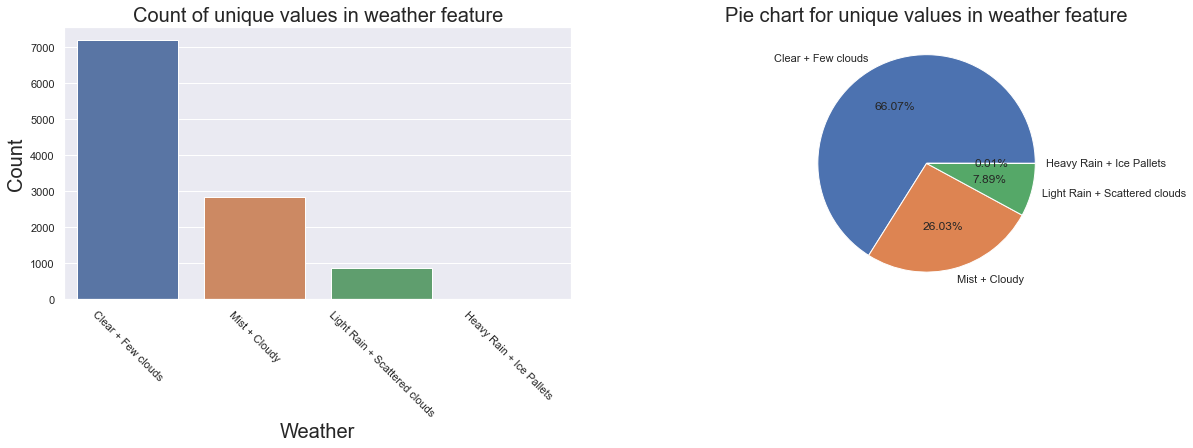

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))

ax1.set_title("Count of unique values in weather feature", fontsize=20)
sns.countplot(train_data['weather'], ax=ax1)
ax1.set_xlabel("Weather", fontsize=20)
ax1.set_ylabel("Count", fontsize=20)
ax1.set_xticklabels(train_data.weather.unique(), rotation=-45)

ax2.set_title("Pie chart for unique values in weather feature", fontsize=20)
ax2.pie(train_data['weather'].value_counts(), labels = train_data.weather.unique(), autopct='%.2f%%')
plt.show()

Following is the count and percent of each value in `weather` column:
1. Clear + Few clouds : 7192 (66.07%)
2. Mist + Cloudy : 2834 (26.03%)
3. Light Rain + Scattered clouds : 859 (7.89%)
4. Heavy Rain + Ice Pallets : 1 (0.01%)

<a id='11'></a>
### 3.3.2 Analysis of `Temperature`, `Feels like temperature`, `Humidity` and `Windspeed`

In this section, we will see the following 3 plots for the each of the 4 features:
1. Scatterplot - How points are scattered in 2D plane.
2. Distplot - Shape(distribution) and how data is spread.
3. Boxxplot - Distribution of data points based on a 5-number summary.

In [12]:
def plotUnivariateAnalysis(label, col_name):
    
    fig, axs = plt.subplots(1, 3, figsize=(20,5))

    sns.scatterplot(train_data.index, train_data[col_name], ax=axs[0])
    axs[0].set_title("Scatterplot for " + label, fontsize=10)
    axs[0].set_ylabel(label)

    sns.distplot(train_data[col_name], ax=axs[1], color='red')
    axs[1].set_title("Distribution of " + label, fontsize=10)
    axs[1].set_xlabel(label)

    sns.boxplot(train_data[col_name], ax=axs[2], color='green')
    axs[2].set_title("Boxplot for " + label, fontsize=10)
    axs[2].set_xlabel(label)

    plt.show()

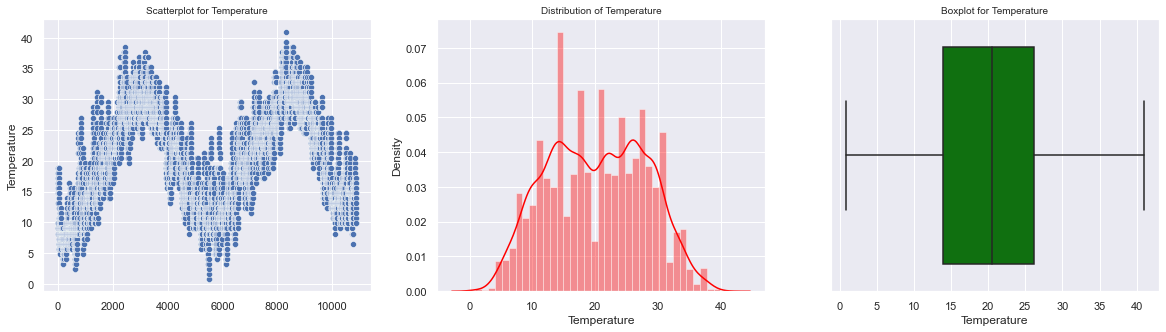

In [13]:
# Plots for Temperature
plotUnivariateAnalysis("Temperature", "temp")

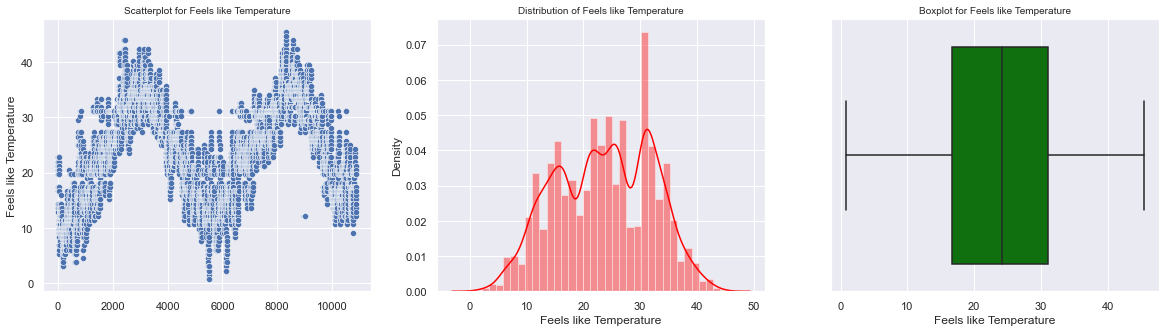

In [14]:
# Plots for Feels like Temperature
plotUnivariateAnalysis("Feels like Temperature", "atemp")

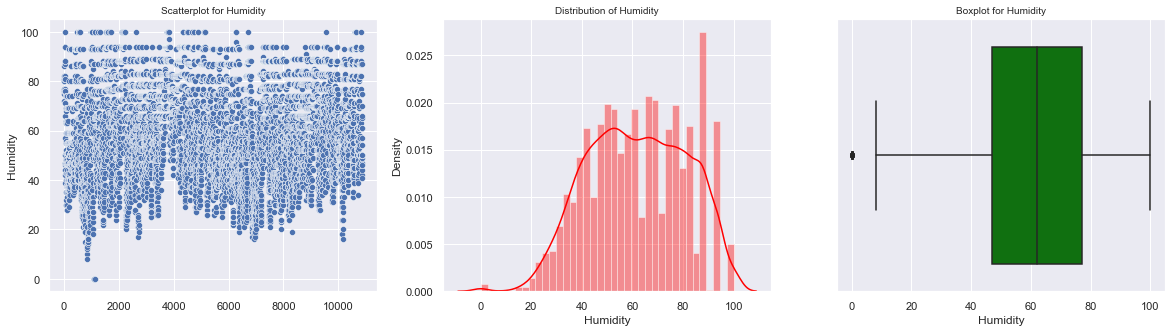

In [15]:
# Plots for Humidity
plotUnivariateAnalysis("Humidity", "humidity")

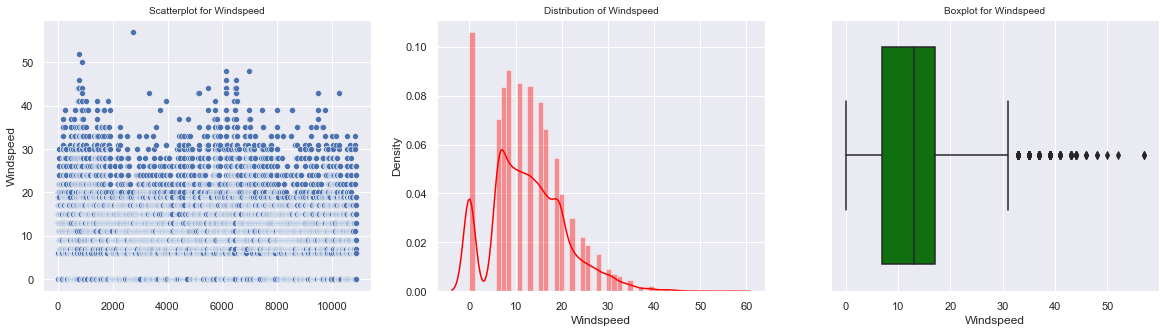

In [16]:
# Plots for Windspeed
plotUnivariateAnalysis("Windspeed", "windspeed")

### Inferences:

* Scatterplots for `Temperature` and `Feels like temperature` are really interesting **(M shaped)**. This is because data is captured starting from winters. Hence the low temperatures. Then the Temp increses as season shifts towards summers. Hence the high temperatures. Again, the temperature decreases as we move towards winters. Hence the low temperatures. This completes 1 year data i.e 2011. A Similar observation is seen for 2012 as well. Hence the M shape.
* Scatterplot for `Humidity` have almost all point in the **upper region**. This is obvious as humidity is rarely 0 and always greater than 20%-30% mark.
* Scatterplot for `Windspeed` have almost all point in the **lower region**. This is obvious as windspeed is rarely high and is mostly either 0 or greater than 0.
* Distribution plot for `Temperature` and `Feels like temperature` are **not normally distributed**. A log-transform might be helpful here.
* Distribution plot for `Humidity` and `Windspeed` are **not normally distributed** with former having left skewness and latter having right skewness.
* Boxplot plot for `Temperature` and `Feels like temperature` shows **no outliers**.
* Boxplot plot for `Humidity` shows outlier in the lower region (left side).
* Boxplot plot for `Windspeed` shows outlier in the upper region (right side).

<a id='12'></a>
### 3.3.3 Target Features Analysis

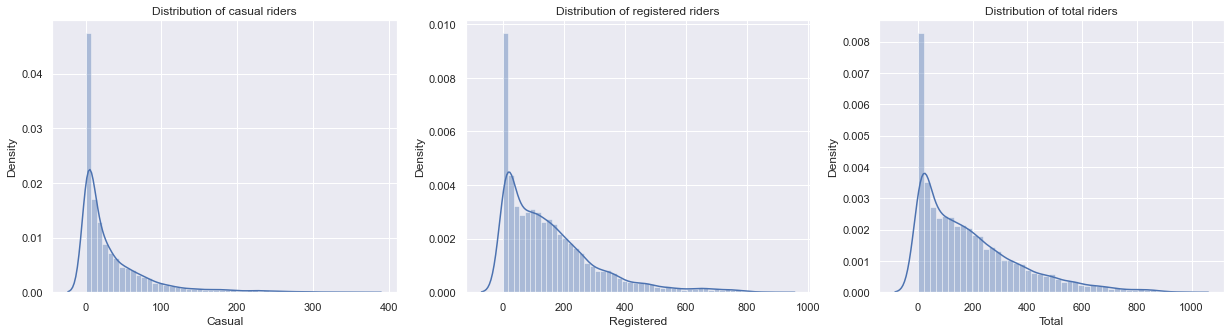

In [17]:
fig, axis = plt.subplots(1, 3, figsize=(21,5))
sns.distplot(train_data['casual'], ax=axis[0])
axis[0].set_title("Distribution of casual riders")
axis[0].set_xlabel("Casual")
sns.distplot(train_data['registered'], ax=axis[1])
axis[1].set_title("Distribution of registered riders")
axis[1].set_xlabel("Registered")
sns.distplot(train_data['count'], ax=axis[2])
axis[2].set_title("Distribution of total riders")
axis[2].set_xlabel("Total")
plt.show()

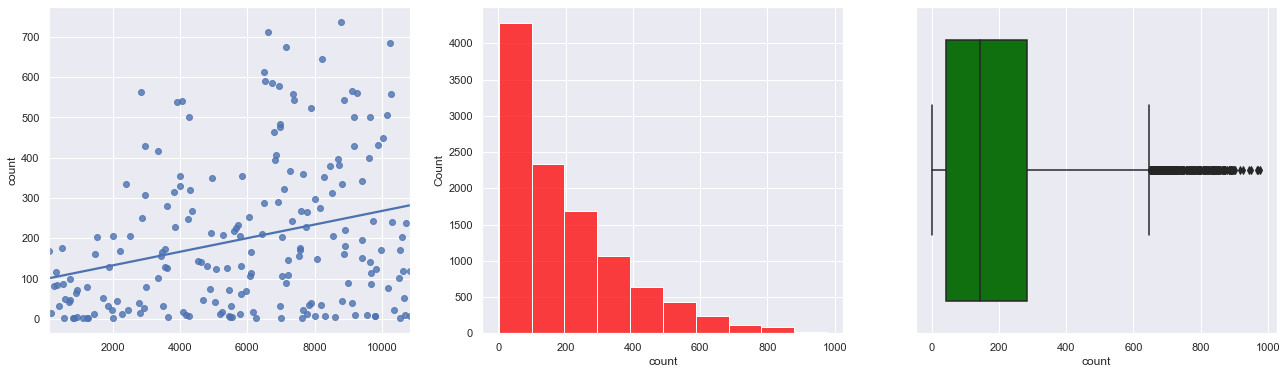

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(22, 6))
# Scatter of random 200 samples
temp_df = train_data.sample(200)
sns.regplot(temp_df.index, temp_df['count'], ci=False, ax=ax[0])
# How data is distributed across bins
sns.histplot(train_data['count'], bins=10, ax=ax[1], color='red')
# Outliers in Target feature
sns.boxplot(train_data['count'], ax=ax[2], color='green')
plt.show()

### Inferences:

1. Distribution of target is <u>not normal</u> and is right skewed in all three cases.

2. There is an overall <u>increase in demand of Rental Bikes over time</u>.

3. Most No. of Bikes rented lie in the range 0-200.

4. Our target feature <u>suffers from outlier problem</u> and has quite a lot of them present.

<a id='13'></a>
## 3.4 Bi-Variate Analysis

<a id='14'></a>
### 3.4.1 How the `Time of Day (Hour)` relates with the `Bike Rental`

To see this relation, we will calculate number of bikes rented in each hour of day over 2 years data.

In [19]:
nb_hours = list(train_data.hour.unique())
nb_bikes_rented = []
for hr in nb_hours:
    bikesRented = train_data[train_data['hour'] == hr]['count'].sum()
    nb_bikes_rented.append(bikesRented)

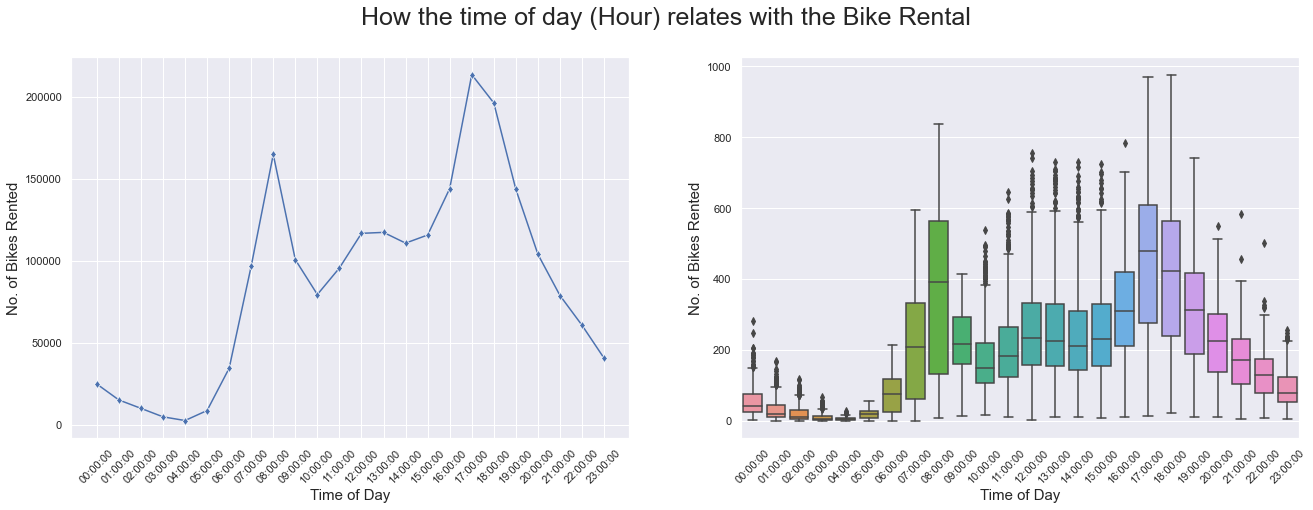

In [20]:
fig, ax = plt.subplots(1,2,figsize=(22, 7))

plt.suptitle("How the time of day (Hour) relates with the Bike Rental", fontsize=25)

sns.lineplot(nb_hours, nb_bikes_rented, markevery=1, marker='d', ax=ax[0])
ax[0].set_xlabel('Time of Day', fontsize=15)
ax[0].set_ylabel('No. of Bikes Rented', fontsize=15)
ax[0].set_xticklabels(rotation=45, labels=nb_hours)

sns.boxplot(train_data['hour'], train_data['count'], ax=ax[1])
ax[1].set_xlabel('Time of Day', fontsize=15)
ax[1].set_ylabel('No. of Bikes Rented', fontsize=15)
ax[1].set_xticklabels(rotation=45, labels=nb_hours)

plt.show()

### Inferences:

***Notice there are <u>two peaks</u> in the first plot.***
* One peek is at 8:00 o'clock in the morning. 
* Second peek is at 5:00 o'clock - 6:00 o'clock in the evening. 

***Such a line plot is pretty obvious because peak hours are the office, school and college commute hours in morning and evening respectively.***<br>
***The increased lengths of boxplots at these 2 times also depict the hike of bike rentals.***

<a id='15'></a>
### 3.4.2 How `Month` affects the `Bike Rental`
To see how month of year affects the bike rental, we will calculate number of bikes rented in each month over 2 years data.

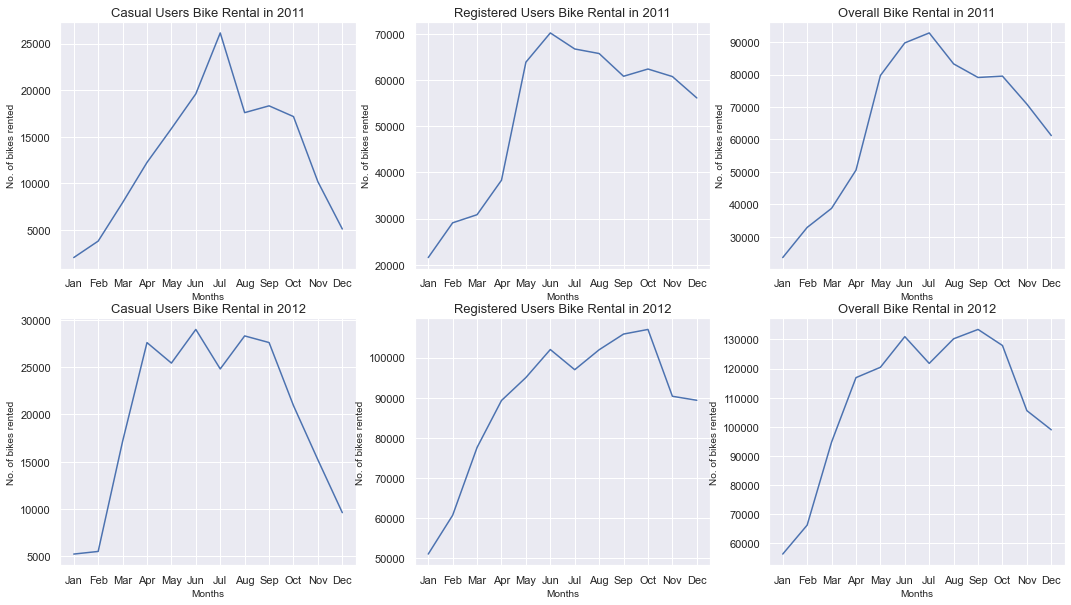

In [21]:
years = list(train_data['year'].unique())
months = list(train_data['month'].unique())
casual_users = []
registered_users = []
overall_bikes_rented = []
for year in years:
    for month in months:
        casual_users.append(train_data[(train_data['year']==year) & (train_data['month']==month)]['casual'].sum())
        registered_users.append(train_data[(train_data['year']==year) & (train_data['month']==month)]['registered'].sum())
        overall_bikes_rented.append(train_data[(train_data['year']==year) & (train_data['month']==month)]['count'].sum())
        
casual_2011 = casual_users[:12]
casual_2012 = casual_users[12:]
registered_2011 = registered_users[:12]
registered_2012 = registered_users[12:]
bikes_rented_2011 = overall_bikes_rented[:12]
bikes_rented_2012 = overall_bikes_rented[12:]

# Plots showing bikes rented each month in 2011 and 2012
fig, axis = plt.subplots(2, 3, figsize=(18,10))

axis[0,0].set_title("Casual Users Bike Rental in 2011", fontsize=13)
axis[0,0].set_xlabel("Months", fontsize=10)
axis[0,0].set_ylabel("No. of bikes rented", fontsize=10)
axis[0,0].plot(months, casual_2011)

axis[0,1].set_title("Registered Users Bike Rental in 2011", fontsize=13)
axis[0,1].set_xlabel("Months", fontsize=10)
axis[0,1].set_ylabel("No. of bikes rented", fontsize=10)
axis[0,1].plot(months, registered_2011)

axis[0,2].set_title("Overall Bike Rental in 2011", fontsize=13)
axis[0,2].set_xlabel("Months", fontsize=10)
axis[0,2].set_ylabel("No. of bikes rented", fontsize=10)
axis[0,2].plot(months, bikes_rented_2011)

axis[1,0].set_title("Casual Users Bike Rental in 2012", fontsize=13)
axis[1,0].set_xlabel("Months", fontsize=10)
axis[1,0].set_ylabel("No. of bikes rented", fontsize=10)
axis[1,0].plot(months, casual_2012)

axis[1,1].set_title("Registered Users Bike Rental in 2012", fontsize=13)
axis[1,1].set_xlabel("Months", fontsize=10)
axis[1,1].set_ylabel("No. of bikes rented", fontsize=10)
axis[1,1].plot(months, registered_2012)

axis[1,2].set_title("Overall Bike Rental in 2012", fontsize=13)
axis[1,2].set_xlabel("Months", fontsize=10)
axis[1,2].set_ylabel("No. of bikes rented", fontsize=10)
axis[1,2].plot(months, bikes_rented_2012)

plt.show()

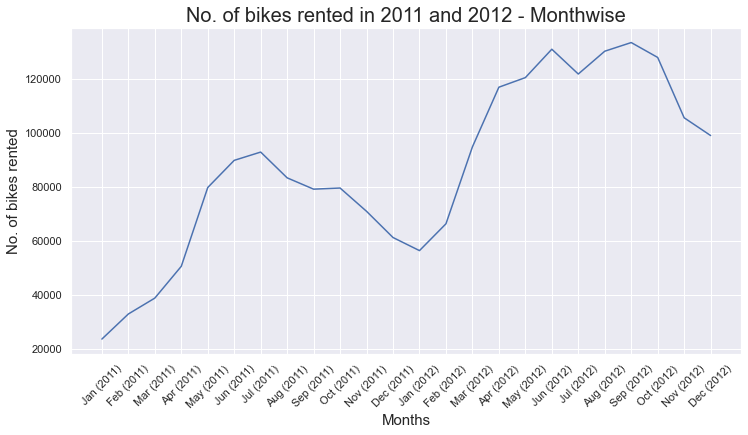

In [22]:
# Single Plot showing bikes rented each month each year - Overall
months_2011 = [x + ' (2011)' for x in months]
months_2012 = [x + ' (2012)' for x in months]
plt.figure(figsize=(12,6))
plt.title("No. of bikes rented in 2011 and 2012 - Monthwise", fontsize=20)
plt.plot(months_2011 + months_2012, overall_bikes_rented)
plt.xlabel("Months", fontsize=15)
plt.ylabel("No. of bikes rented", fontsize=15)
plt.xticks(rotation=45)
plt.show()

### Inferences:

1. In January, the demand is really low each year. This can be explained by the winter season where commuters prefer less bike rides due to cold and chilly weather and maybe snowfall.

2. Bike demand increases as months pass. This can be attributed to the Spring, Summer and Fall seasons where the weather is either very pleasant or sunny and people prefer more bike rides.

3. Bike demand is highest between May and October each year. This can be attributed to the Spring, Summer and Fall seasons.

4. Bike demand lowers again as we move towards winters each year.

5. It can be observed that there is an <u>overall increasing trend</u> i.e. overall increase in demand of Rental Bikes over the years by looking at the combined graph.

<a id='16'></a>
### 3.4.3 How `Season` affects the `Bike Rental` Demand

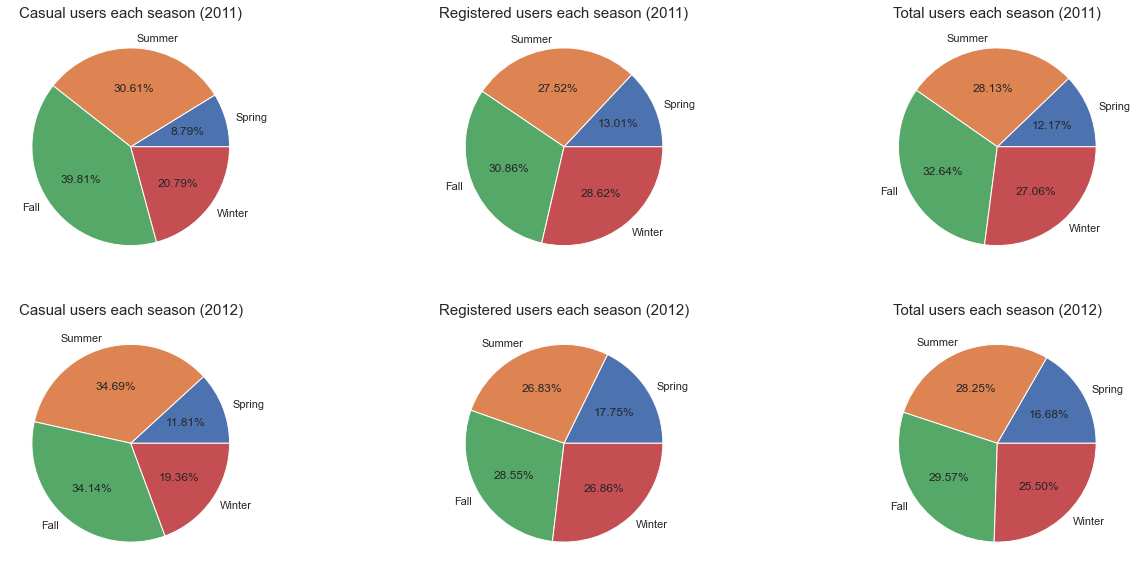

In [23]:
casual_seasonwise = []
years = ['2011', '2012']
registered_seasonwise = []
count_seasonwise = []
seasons = list(train_data['season'].unique())

for year in years:
    for season in seasons:
        casual_seasonwise.append(train_data[(train_data['season']==season) & (train_data['year']==year)]['casual'].sum())
        registered_seasonwise.append(train_data[(train_data['season']==season) & (train_data['year']==year)]['registered'].sum())
        count_seasonwise.append(train_data[(train_data['season']==season) & (train_data['year']==year)]['count'].sum())
        
fig, axis = plt.subplots(2, 3, figsize=(22,10))

axis[0,0].set_title("Casual users each season (2011)", fontsize=15)
axis[0,0].pie(casual_seasonwise[:4], labels=seasons, autopct='%.2f%%')

axis[0,1].set_title("Registered users each season (2011)", fontsize=15)
axis[0,1].pie(registered_seasonwise[:4], labels=seasons, autopct='%.2f%%')

axis[0,2].set_title("Total users each season (2011)", fontsize=15)
axis[0,2].pie(count_seasonwise[:4], labels=seasons, autopct='%.2f%%')

axis[1,0].set_title("Casual users each season (2012)", fontsize=15)
axis[1,0].pie(casual_seasonwise[4:], labels=seasons, autopct='%.2f%%')

axis[1,1].set_title("Registered users each season (2012)", fontsize=15)
axis[1,1].pie(registered_seasonwise[4:], labels=seasons, autopct='%.2f%%')

axis[1,2].set_title("Total users each season (2012)", fontsize=15)
axis[1,2].pie(count_seasonwise[4:], labels=seasons, autopct='%.2f%%')

plt.show()

In [24]:
spring_target_total = []
summer_target_total = []
fall_target_total = []
winter_target_total = []
targets = ['casual', 'registered', 'count']

for year in years:
    for target in targets:
        spring_target_total.append(train_data[(train_data['year']==year) & (train_data['season']=='Spring')][target].sum())
        summer_target_total.append(train_data[(train_data['year']==year) & (train_data['season']=='Summer')][target].sum())
        fall_target_total.append(train_data[(train_data['year']==year) & (train_data['season']=='Fall')][target].sum())
        winter_target_total.append(train_data[(train_data['year']==year) & (train_data['season']=='Winter')][target].sum())

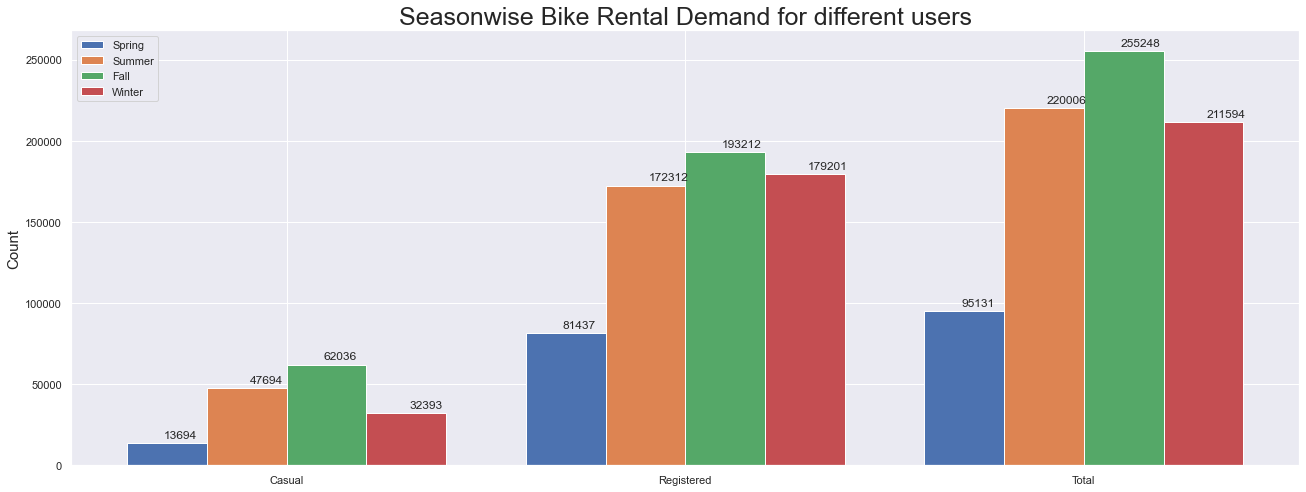

In [25]:
N = 3
ind = np.arange(N) 
width = 0.20

fig, ax = plt.subplots(figsize=(22, 8))
rects1 = ax.bar(ind - width, spring_target_total[:3], width, label='Spring')
rects2 = ax.bar(ind, summer_target_total[:3], width, label='Summer')
rects3 = ax.bar(ind + width, fall_target_total[:3], width, label='Fall')
rects4 = ax.bar(ind + 2*width, winter_target_total[:3], width, label='Winter')

plt.title('Seasonwise Bike Rental Demand for different users', fontsize=25)
plt.ylabel('Count', fontsize=15)


plt.xticks(ind + width / 2, ('Casual', 'Registered', 'Total'))


# Put label above each bar plot
def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    #ha=ha[xpos], 
                    va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")
autolabel(rects3, "left")
autolabel(rects4, "right")

plt.legend(loc='upper left')
plt.show()

<a id='17'></a>
### 3.4.4 How `holiday`, `working day` and `weekend` affect the `Rental Bike Demand`

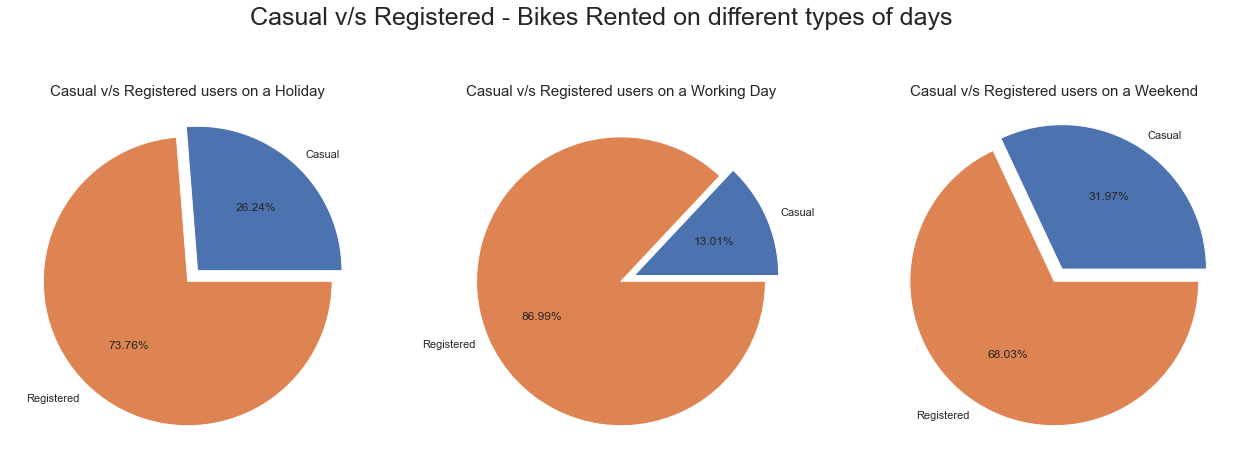

In [26]:
users = ['casual', 'registered']
holiday_list = []
weekend_list = []
workingday_list = []
for user in users:
    holiday_list.append(train_data[train_data['holiday']=='Yes'][user].sum())
    weekend_list.append(train_data[(train_data['weekend']=='Yes')][user].sum())
    workingday_list.append(train_data[(train_data['workingday']=='Yes')][user].sum())   

# Plot for bikes rented on different types of days by Casual and Registered users
labels = ['Casual', 'Registered']
fig, ax = plt.subplots(1,3, figsize=(22,8))
explode = (0.1,0)

plt.suptitle("Casual v/s Registered - Bikes Rented on different types of days", fontsize=25)

ax[0].set_title("Casual v/s Registered users on a Holiday", fontsize=15)
ax[0].pie(holiday_list, autopct='%.2f%%', labels=labels, explode=explode)

ax[1].set_title("Casual v/s Registered users on a Working Day", fontsize=15)
ax[1].pie(workingday_list, autopct='%.2f%%', labels=labels, explode=explode)

ax[2].set_title("Casual v/s Registered users on a Weekend", fontsize=15)
ax[2].pie(weekend_list, autopct='%.2f%%', labels=labels, explode=explode)

plt.show()

###  Inferences:
1. Bike rentals by casual users on Working days are least and increases on Weekends and Holidays.

2. For casual users - Bike Rental Demand is minimum on a working day whereas it is maximum on a weekend.

3. For registered users - Bike Rental Demand is minimum on a weekend whereas it is maximum on a working day.

<a id='18'></a>
### 3.4.5 How `Weather` affects the `Rental Bike Demand`

In [27]:
weathers = list(train_data['weather'].unique())
clear_weather_rentals = []
mist_weather_rentals = []
light_rain_weather_rentals = []
heavy_rain_weather_rentals = []
years = list(train_data['year'].unique())
for year in years:
    for weather in weathers:
        if weather == 'Clear + Few clouds':
            clear_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['casual'].sum())
            clear_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['registered'].sum())
        elif weather == 'Mist + Cloudy':
            mist_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['casual'].sum())
            mist_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['registered'].sum())
        elif weather == 'Light Rain + Scattered clouds':
            light_rain_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['casual'].sum())
            light_rain_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['registered'].sum())
        else:
            heavy_rain_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['casual'].sum())
            heavy_rain_weather_rentals.append(train_data[(train_data['year']==year) & (train_data['weather']==weather)]['registered'].sum())

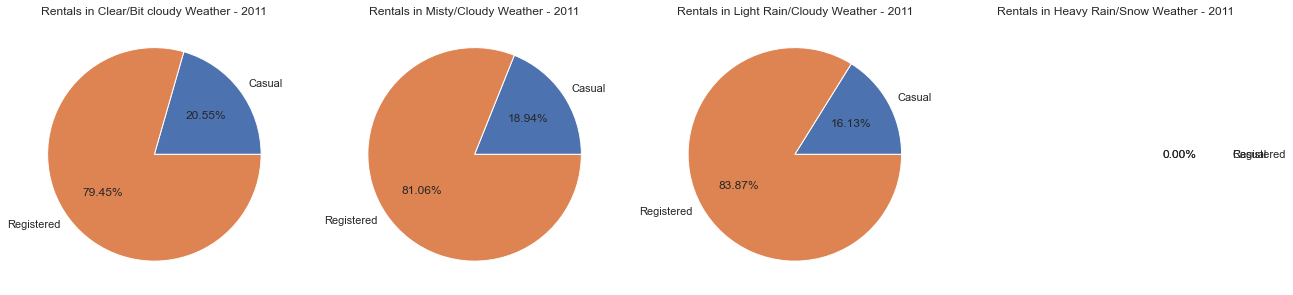

In [28]:
labels = ['Casual', 'Registered']
fig, axs = plt.subplots(1,4, figsize=(22,10))

axs[0].set_title("Rentals in Clear/Bit cloudy Weather - 2011")
axs[0].pie(clear_weather_rentals[:2], labels=labels, autopct='%.2f%%')

axs[1].set_title("Rentals in Misty/Cloudy Weather - 2011")
axs[1].pie(mist_weather_rentals[:2], labels=labels, autopct='%.2f%%')

axs[2].set_title("Rentals in Light Rain/Cloudy Weather - 2011")
axs[2].pie(light_rain_weather_rentals[:2], labels=labels, autopct='%.2f%%')

axs[3].set_title("Rentals in Heavy Rain/Snow Weather - 2011")
axs[3].pie(heavy_rain_weather_rentals[:2], labels=labels, autopct='%.2f%%')

plt.show()

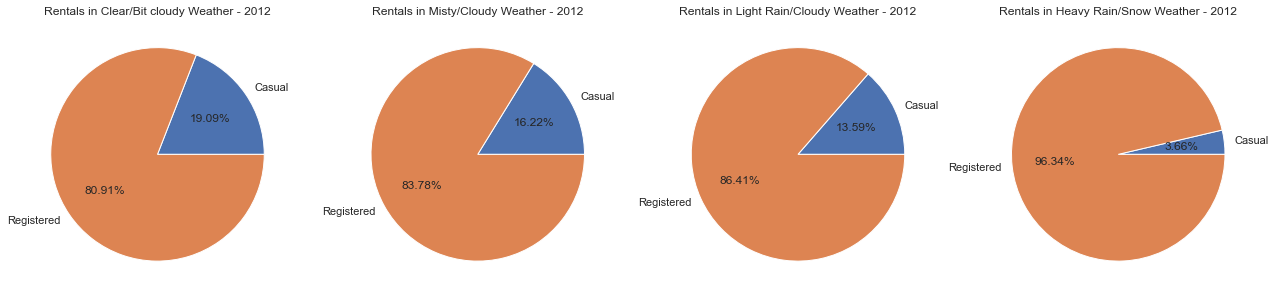

In [29]:
fig, axs = plt.subplots(1,4, figsize=(22,10))

axs[0].set_title("Rentals in Clear/Bit cloudy Weather - 2012")
axs[0].pie(clear_weather_rentals[2:], labels=labels, autopct='%.2f%%')

axs[1].set_title("Rentals in Misty/Cloudy Weather - 2012")
axs[1].pie(mist_weather_rentals[2:], labels=labels, autopct='%.2f%%')

axs[2].set_title("Rentals in Light Rain/Cloudy Weather - 2012")
axs[2].pie(light_rain_weather_rentals[2:], labels=labels, autopct='%.2f%%')

axs[3].set_title("Rentals in Heavy Rain/Snow Weather - 2012")
axs[3].pie(heavy_rain_weather_rentals[2:], labels=labels, autopct='%.2f%%')

plt.show()

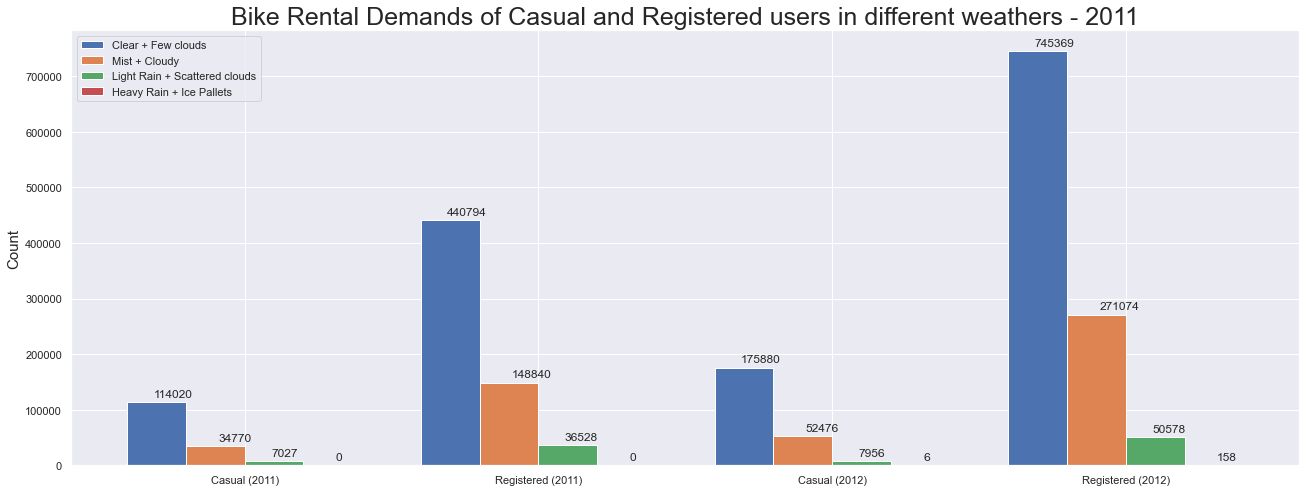

In [30]:
N = 4
ind = np.arange(N) 
width = 0.20

fig, ax = plt.subplots(figsize=(22, 8))
rects1 = ax.bar(ind - width, clear_weather_rentals, width, label=weathers[0])
rects2 = ax.bar(ind, mist_weather_rentals, width, label=weathers[1])
rects3 = ax.bar(ind + width, light_rain_weather_rentals, width, label=weathers[2])
rects4 = ax.bar(ind + 2*width, heavy_rain_weather_rentals, width, label=weathers[3])

plt.title('Bike Rental Demands of Casual and Registered users in different weathers - 2011', fontsize=25)
plt.ylabel('Count', fontsize=15)


plt.xticks(ind + width / 2, ('Casual (2011)', 'Registered (2011)', 'Casual (2012)', 'Registered (2012)'))


# Put label above each bar plot
def autolabel(rects, xpos='center'):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}
    
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    #ha=ha[xpos], 
                    va='bottom')

autolabel(rects1, "left")
autolabel(rects2, "right")
autolabel(rects3, "left")
autolabel(rects4, "right")

plt.legend(loc='upper left')
plt.show()

<a id='19'></a>
### 3.4.6 How `Temperature` affects the `Bike Rental Demand`

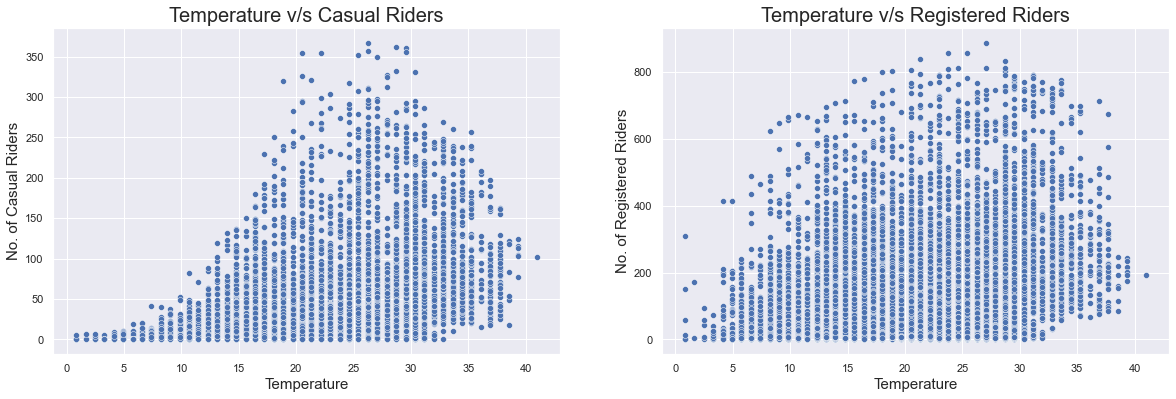

In [31]:
fig, axs = plt.subplots(1,2, figsize=(20,6))

axs[0].set_title("Temperature v/s Casual Riders", fontsize=20)
sns.scatterplot(train_data['temp'], train_data['casual'], ax=axs[0])
axs[0].set_xlabel("Temperature", fontsize=15)
axs[0].set_ylabel("No. of Casual Riders", fontsize=15)

axs[1].set_title("Temperature v/s Registered Riders", fontsize=20)
sns.scatterplot(train_data['temp'], train_data['registered'], ax=axs[1])
axs[1].set_xlabel("Temperature", fontsize=15)
axs[1].set_ylabel("No. of Registered Riders", fontsize=15)

plt.show()

### To have a more clear picture of the relation between two, we will take sample of 200 instead of taking whole dataset. Taking the wholedataset makes it confusing to come to a conclusion about the relation. Plot made using whole dataset will also suffer from <u>overplotting</u>, meaning, multiple data points with same x and y values are plotted on top of the other and we see only one point.

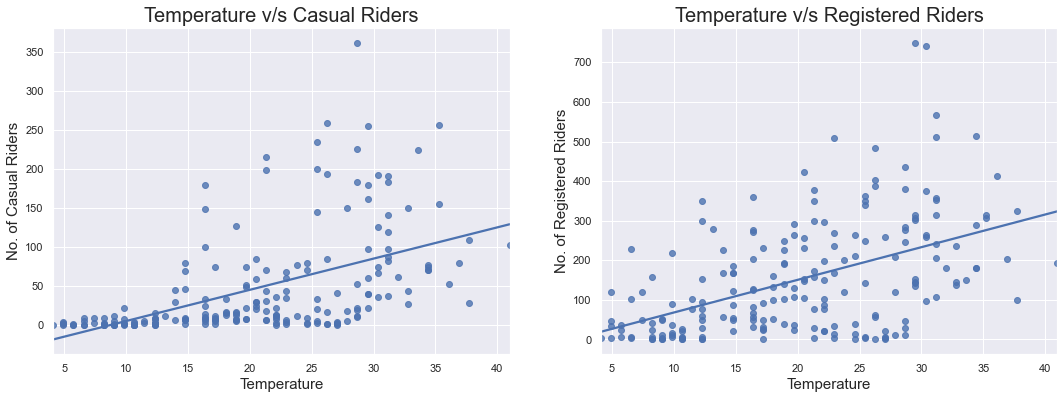

In [32]:
temp_train_df = train_data.sample(200)
fig, axs = plt.subplots(1,2, figsize=(18,6))

axs[0].set_title("Temperature v/s Casual Riders", fontsize=20)
sns.regplot(temp_train_df['temp'], temp_train_df['casual'], ax=axs[0], ci=None)
axs[0].set_xlabel("Temperature", fontsize=15)
axs[0].set_ylabel("No. of Casual Riders", fontsize=15)

axs[1].set_title("Temperature v/s Registered Riders", fontsize=20)
sns.regplot(temp_train_df['temp'], temp_train_df['registered'], ax=axs[1], ci=None)
axs[1].set_xlabel("Temperature", fontsize=15)
axs[1].set_ylabel("No. of Registered Riders", fontsize=15)
plt.show()

**The 2 plots above (after running the same cell multiple times) show us that Temperature and No. of Casual & Registered riders have a weak positive correlation: that is, there is generally an increase in bike rental demand in both types of users when there is an increase in temperature.**

Since, we have a lot of data points, the scatterplot will suffer from overplotting. Let' use a hexplot to gain more insights of temperature-demand relation as well as solve the problem of overplotting.

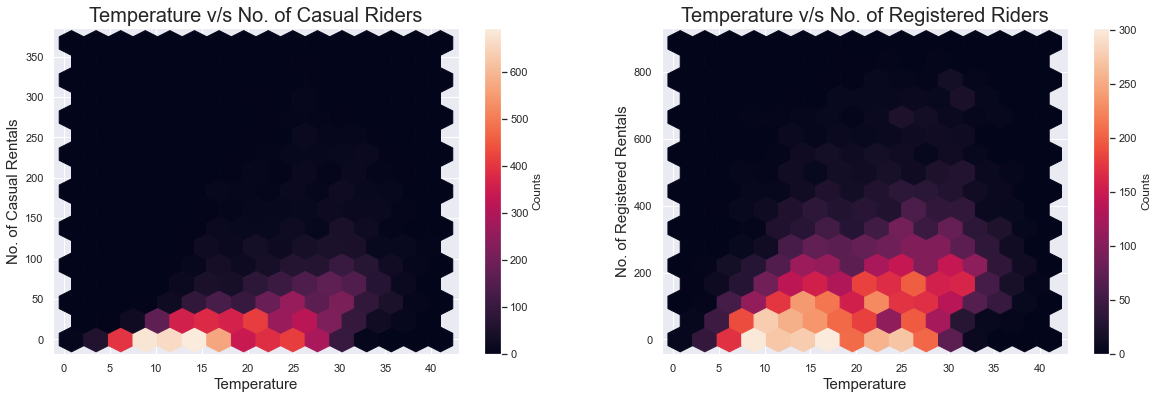

In [33]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

hb1 = axs[0].hexbin(x=train_data['temp'], y=train_data['casual'], gridsize=15)
axs[0].set_title("Temperature v/s No. of Casual Riders", fontsize=20)
axs[0].set_xlabel("Temperature", fontsize=15)
axs[0].set_ylabel("No. of Casual Rentals", fontsize=15)
cb = fig.colorbar(hb1, ax=axs[0])
cb.set_label('Counts')

hb2 = axs[1].hexbin(x=train_data['temp'], y=train_data['registered'], gridsize=15)
axs[1].set_title("Temperature v/s No. of Registered Riders", fontsize=20)
axs[1].set_xlabel("Temperature", fontsize=15)
axs[1].set_ylabel("No. of Registered Rentals", fontsize=15)
cb = fig.colorbar(hb2, ax=axs[1])
cb.set_label('Counts')

plt.show()

### Inferences:

1. The data in these plots is directly comparable with scatter plots from earlier.

2. From first hexplot,
    * We can see that huge amount of data clusters around 7-15 degree celcius where there are 0 bike ren8tals.
    * A moderate amount of data clusters between 15-30 degree celcius where there are 0-30 bike rentals.
    
3. From the second hexplot,
    * We can see that a huge amount of data clusters around 7-20 degree celcius where there are 0-100 bike rentals.
    * A moderate amount of data clusters between 6-33 degree celcius where there are 0-200 bike rentals.

<a id='20'></a>
### 3.4.7 How `Humidity` and `Windspeed` affect the `Biker Rental Demand`

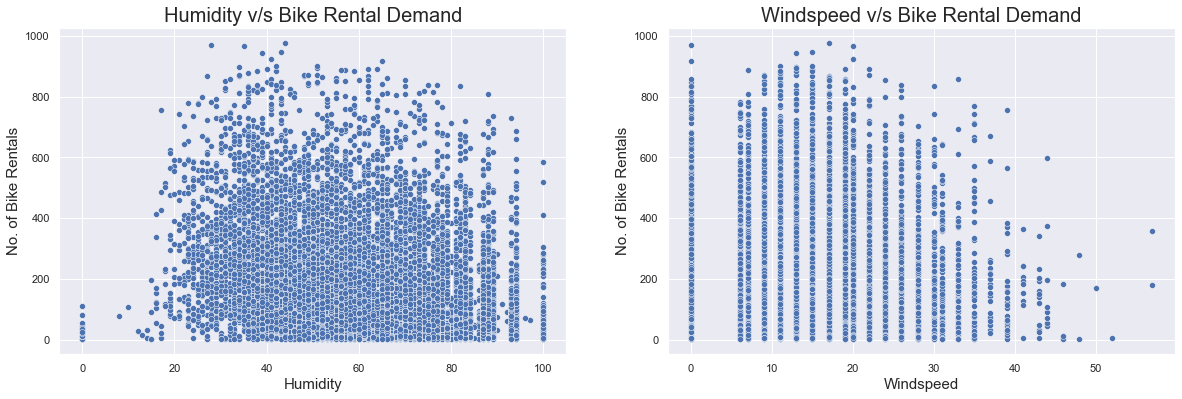

In [34]:
# Windspeed
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].set_title("Humidity v/s Bike Rental Demand", fontsize=20)
sns.scatterplot(train_data['humidity'], train_data['count'], ax=ax[0])
ax[0].set_xlabel("Humidity", fontsize=15)
ax[0].set_ylabel("No. of Bike Rentals", fontsize=15)

ax[1].set_title("Windspeed v/s Bike Rental Demand", fontsize=20)
sns.scatterplot(train_data['windspeed'], train_data['count'], ax=ax[1])
ax[1].set_xlabel("Windspeed", fontsize=15)
ax[1].set_ylabel("No. of Bike Rentals", fontsize=15)

plt.show()

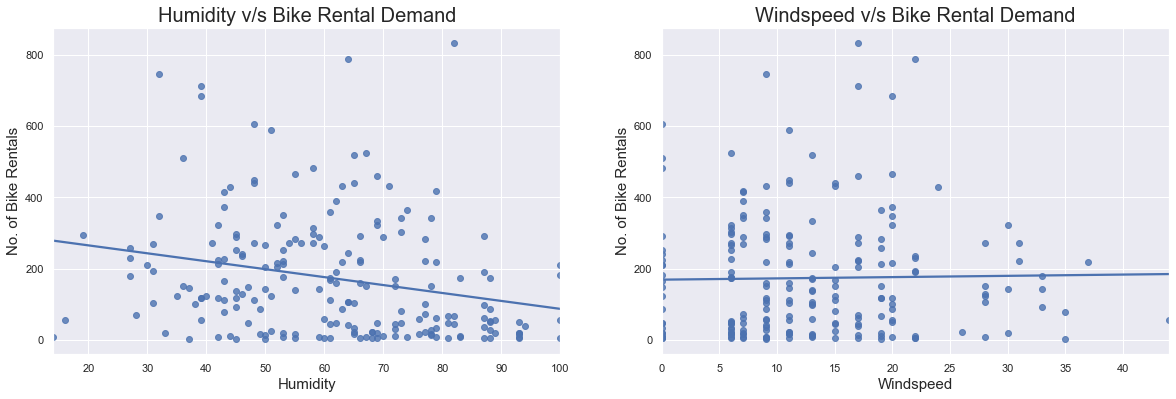

In [35]:
temp_df = train_data.sample(200)

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

ax[0].set_title("Humidity v/s Bike Rental Demand", fontsize=20)
sns.regplot(temp_df['humidity'], temp_df['count'], ax=ax[0], ci=None)
ax[0].set_xlabel("Humidity", fontsize=15)
ax[0].set_ylabel("No. of Bike Rentals", fontsize=15)

ax[1].set_title("Windspeed v/s Bike Rental Demand", fontsize=20)
sns.regplot(temp_df['windspeed'], temp_df['count'], ax=ax[1], ci=None)
ax[1].set_xlabel("Windspeed", fontsize=15)
ax[1].set_ylabel("No. of Bike Rentals", fontsize=15)

plt.show()

### **Inferences:**
### **Note : Inferences are based after running the cell multiple times to have solid general outcomes.**

1. From the above first graph (Humidity v/s Bike Rental Demand), there can be seen a weak negative correlation, meaning, generally the Bike Rental demand decreases whenever there is an increase in Humidity.

2. From the above second graph (Windspeed v/s Bike Rental Demand), there can be seen a weak positive correlation, meaning, generally the Bike Rental demand increases whenever there is an increase in Windspeed.

*The scatter plot, as seen in the first plot of this section, suffers from overplotting . To solve this, let's look at the hexbin plot for same to get insights about the concentration of points.*

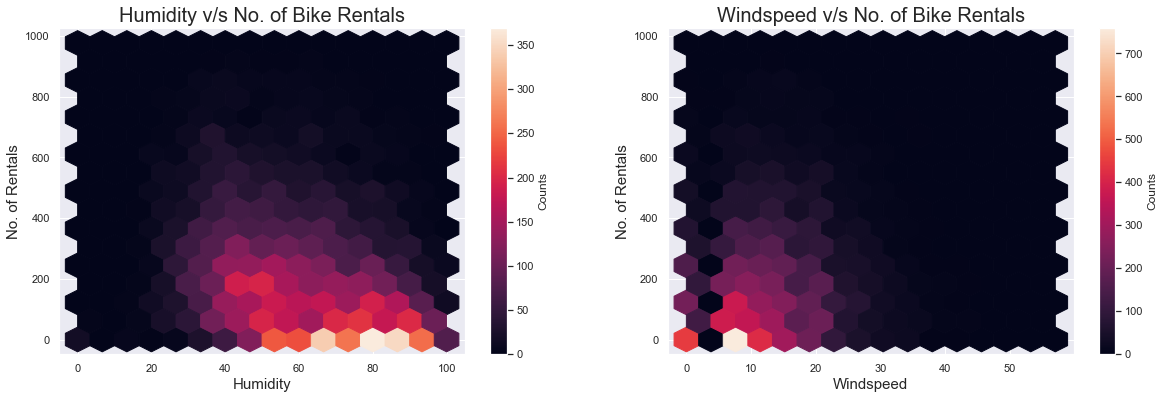

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

hb1 = axs[0].hexbin(x=train_data['humidity'], y=train_data['count'], gridsize=15)
axs[0].set_title("Humidity v/s No. of Bike Rentals", fontsize=20)
axs[0].set_xlabel("Humidity", fontsize=15)
axs[0].set_ylabel("No. of Rentals", fontsize=15)
cb = fig.colorbar(hb1, ax=axs[0])
cb.set_label('Counts')

hb2 = axs[1].hexbin(x=train_data['windspeed'], y=train_data['count'], gridsize=15)
axs[1].set_title("Windspeed v/s No. of Bike Rentals", fontsize=20)
axs[1].set_xlabel("Windspeed", fontsize=15)
axs[1].set_ylabel("No. of Rentals", fontsize=15)
cb = fig.colorbar(hb2, ax=axs[1])
cb.set_label('Counts')

plt.show()

### Inferences:

1. The data in these plots is directly comparable with scatter plots from earlier.

2. From first hexplot, 
    * We can see that huge amount of data clusters when humidiy is 65-70 and 75-85 where there are 0 bike rentals.
    * A moderate amount of data clusters when humidity is 40-85 degree celcius where there are 0-500 bike rentals.

3. From the second hexplot,
    * We can see that a huge amount of data clusters when windspeed is 6-10 where there are 0 bike rentals.
    * A moderate amount of data clusters when windspeed is between 6-12 where there are 0-200 bike rentals.

<a id='21'></a>
## 3.5 Correlation Analysis

In [37]:
train_data.columns

Index(['date', 'hour', 'month', 'year', 'season', 'holiday', 'workingday',
       'weekend', 'weather', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

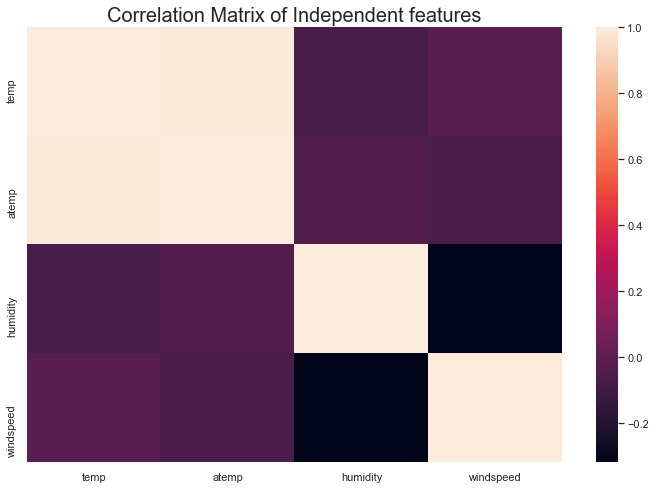

In [38]:
indep_features = ['date', 'hour', 'month', 'year', 'season', 'holiday', 'workingday',
       'weekend', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
plt.figure(figsize=(12,8))
plt.title("Correlation Matrix of Independent features", fontsize=20)
corrmat = train_data[indep_features].corr()
sns.heatmap(corrmat)
plt.show()

### Inferences:

1. There is a really strong relation between `Temperature` and `Feels like Temperature` which is expected. The `Feels like temperature` feature can be removed in the data preparation stage.

2. `Temperature` has a neutral/no correlation with `Humidity` or `Windspeed`.

3. `Humidity` and `Windspeed` have a weak negative correlation, meaning, when speed of wind increases, there is a drop in humidity and vice-versa.

<a id='22'></a>
## 3.6 Outlier Analysis

![](https://miro.medium.com/max/700/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

Let have a look at some boxplots between `count` and other independent features.


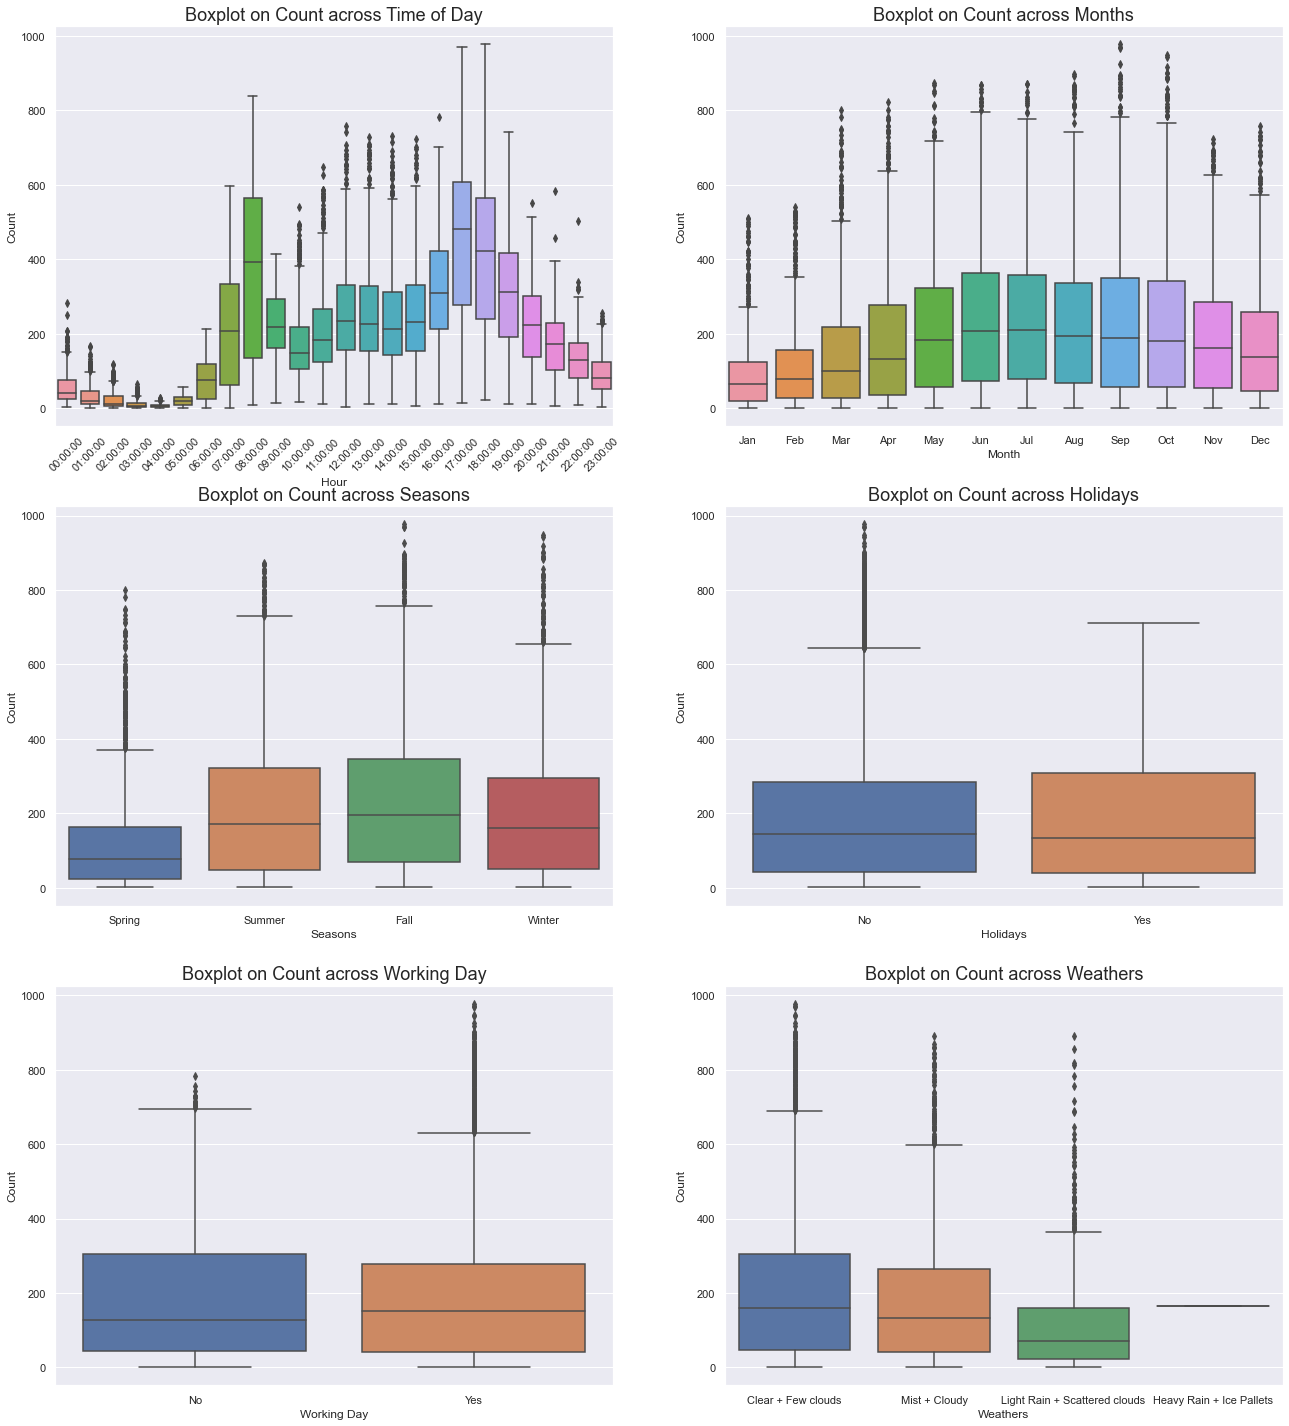

In [39]:
fig, ax = plt.subplots(3,2, figsize=(22,25))

ax[0,0].set_title("Boxplot on Count across Time of Day", fontsize=18)
sns.boxplot(train_data['hour'], train_data['count'], ax=ax[0,0])
ax[0,0].set_xlabel("Hour")
ax[0,0].set_ylabel("Count")
ax[0,0].set_xticklabels(labels=train_data.hour.unique(), rotation=45)

ax[0,1].set_title("Boxplot on Count across Months", fontsize=18)
sns.boxplot(train_data['month'], train_data['count'], ax=ax[0,1])
ax[0,1].set_xlabel("Month")
ax[0,1].set_ylabel("Count")

ax[1,0].set_title("Boxplot on Count across Seasons", fontsize=18)
sns.boxplot(train_data['season'], train_data['count'], ax=ax[1,0])
ax[1,0].set_xlabel("Seasons")
ax[1,0].set_ylabel("Count")

ax[1,1].set_title("Boxplot on Count across Holidays", fontsize=18)
sns.boxplot(train_data['holiday'], train_data['count'], ax=ax[1,1])
ax[1,1].set_xlabel("Holidays")
ax[1,1].set_ylabel("Count")

ax[2,0].set_title("Boxplot on Count across Working Day", fontsize=18)
sns.boxplot(train_data['workingday'], train_data['count'], ax=ax[2,0])
ax[2,0].set_xlabel("Working Day")
ax[2,0].set_ylabel("Count")

ax[2,1].set_title("Boxplot on Count across Weathers", fontsize=18)
sns.boxplot(train_data['weather'], train_data['count'], ax=ax[2,1])
ax[2,1].set_xlabel("Weathers")
ax[2,1].set_ylabel("Count")

plt.show()

### Inferences:

The following inferences can be made:

1. The boxplot with Time of day is quiet interesting. The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.

2. Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.

3. Most of the outlier points are mainly contributed from `workingday` when value is 'yes' (or `holiday` when the value is 'no') than a "Non-working day". This can be confirmed graphically from plots 3 & 4.